In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

Checkered Board

In [2]:
#Bàn cờ có cạnh là 8 ô, mỗi ô là 50 điểm ảnh
square = 50
board = 8

#Viết hàm điền màu trắng cho các ô
def create_chessboard(board=8, square=50):
    chessboard = np.zeros((board*square,board*square),dtype=np.uint8)
    for row in range(board):
        for col in range(board):
            if((row+col)%2==0):
                chessboard[row*square : (row+1)*square,
                           col*square : (col+1)*square] = 255
                
    return chessboard

#Tạo ma trận bàn cờ
chessboard = create_chessboard(board,square)
chessboard

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

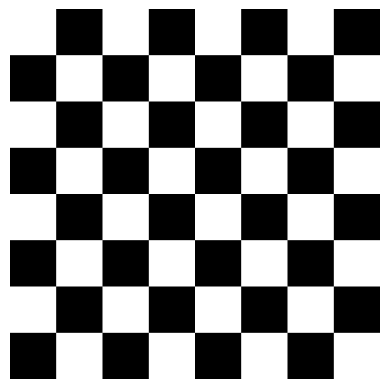

In [15]:
plt.imshow(chessboard, cmap='gray')
plt.axis('off')
plt.show()

Color correction

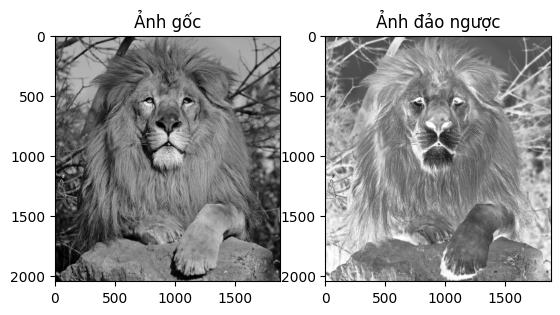

In [4]:
#Đọc hình ảnh
image = cv2.imread('img/Lion.jpg',0)

#Đảo ngược màu sắc hình ảnh
inverted_image = 255 - image

#Lưu lại ảnh
cv2.imwrite('img/noiL.jpg',inverted_image)
plt.figure()
plt.subplot(121); plt.title("Ảnh gốc"); plt.imshow(image, cmap='gray')
plt.subplot(122); plt.title("Ảnh đảo ngược"); plt.imshow(inverted_image, cmap='gray')
plt.show()

Rotate Image

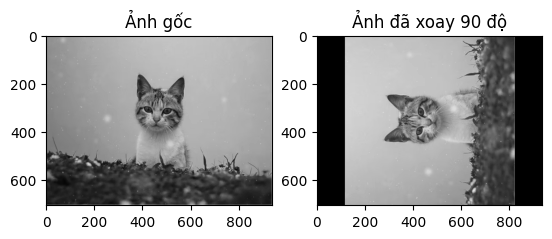

In [5]:
#Đọc file
img = cv2.imread('img/cat.jpg',0)
#Hàm rotate
def rotate_img(img, angle):
    #Lấy kích thước ảnh
    (h,w) = img.shape
    #Tính toán tâm của hình ảnh
    center = (w//2, h//2)
    #Chuyển đội độ sang rad
    angle_rad = math.radians(angle)
    #Tạo hình ảnh mới với kích thước tương tự
    rotate_image = np.zeros_like(img)
    
    #Xoay
    for y in range(h):
        for x in range(w):
            #khoảnh cách từ điểm đó đến tâm
            x_centered = x - center[0] 
            y_centered = y - center[1]
            
            #tính tọa độ mới sau khi quay
            new_x = int(x_centered * math.cos(angle_rad) - y_centered * math.sin(angle_rad) + center[0])
            new_y = int(x_centered * math.sin(angle_rad) + y_centered * math.cos(angle_rad) + center[1])
            
            #Nếu tọa độ mới nằm trong phạm vi hình ảnh
            if 0 <= new_x < w and 0 <= new_y < h:
                rotate_image[y,x] = img[new_y, new_x]
    return rotate_image           

r_img = rotate_img(img,90)
cv2.imwrite('img/r_cat.jpg',r_img)
plt.figure()
plt.subplot(121); plt.title("Ảnh gốc"); plt.imshow(img,cmap='gray')
plt.subplot(122); plt.title("Ảnh đã xoay 90 độ"); plt.imshow(r_img, cmap='gray')
plt.show()

Color separation

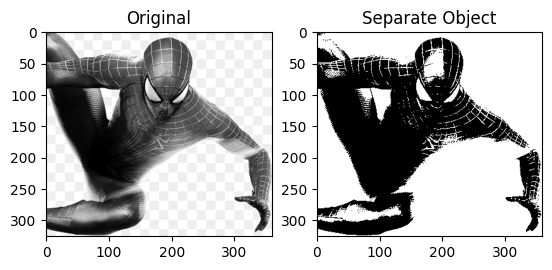

In [6]:
# Đọc ảnh
img = cv2.imread('img/spider_man.jpg',0)
# Đặt giá trị ngưỡng
thresh_value = 127
_, binary_image = cv2.threshold(img, thresh_value, 255, cv2.THRESH_BINARY)
plt.figure()
plt.subplot(121); plt.title("Original"); plt.imshow(img, cmap='gray')
plt.subplot(122); plt.title("Separate Object"); plt.imshow(binary_image,cmap='gray');
plt.show()

Corner line

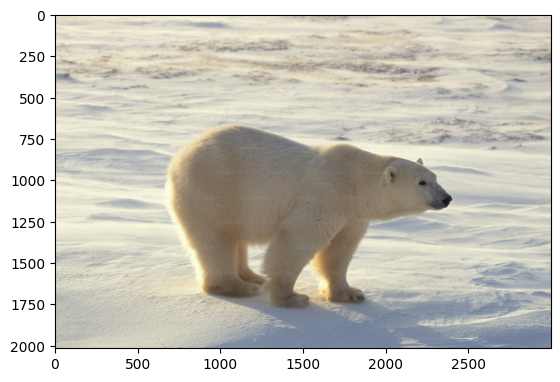

(2016, 3000, 3)


In [5]:
img = cv2.imread('img/white_bear.jpg')
plt.imshow(img[:,:,::-1])
plt.show()
print(img.shape)

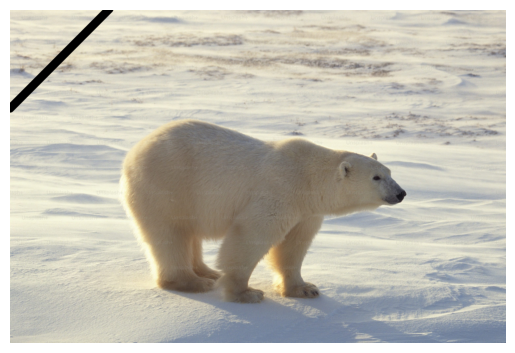

In [6]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cài đặt tham số
thickness = 50
color = (0, 0, 0)  # Đen

def draw_thick_line(img, thickness, color):
    h, w = img.shape[:2]
    x_start, y_start = w//5, 0  # Góc trên bên trái
    x_end, y_end = 0, w//5  # Góc dưới bên phải

    dx = abs(x_end - x_start)
    dy = abs(y_end - y_start)
    sx = 1 if x_start < x_end else -1
    sy = 1 if y_start < y_end else -1
    err = dx - dy
    #Ở đây dùng thuật toán Bresenham để vẽ đường thẳng chính, sau đó thêm các pixel xung quanh làm cho đường thẳng dày lên
    while True:
        # Vẽ đường thẳng dày
        for i in range(-thickness // 2, thickness // 2 + 1):
            for j in range(-thickness // 2, thickness // 2 + 1):
                if (i**2 + j**2 <= (thickness // 2)**2):  # Kiểm tra xem điểm có nằm trong hình tròn dày không
                    xi = int(x_start + i)
                    yi = int(y_start + j)
                    if 0 <= xi < w and 0 <= yi < h:
                        img[yi, xi] = color

        if x_start == x_end and y_start == y_end:
            break
        
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x_start += sx
        if e2 < dx:
            err += dx
            y_start += sy

# Kẻ đường thẳng dày lên ảnh
draw_thick_line(img_rgb, thickness, color)

# Hiển thị ảnh với đường thẳng
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

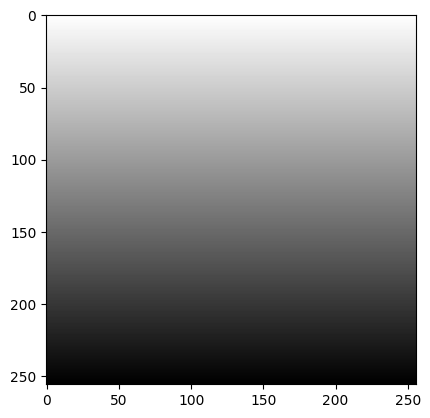

In [9]:
#Gradient
#Tạo một mảng 2 chiều với kích thước 256x256
img_arr = np.zeros((256,256),dtype=np.uint8)
img_arr.shape
#Viết hàm thay đổi sắc độ từ trên xuống dưới
def Gradient_down(img):
    g_img = img.copy()
    h,w = img_arr.shape
    for i in range(h):
        g_img[i,:] = 255-i
    return g_img
g_img = Gradient_down(img_arr)
plt.imshow(g_img, cmap='gray')

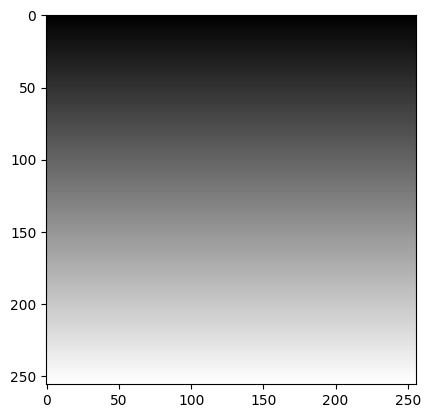

In [10]:
#Viết hàm thay đổi sắc độ từ trên dưới lên trên
def Gradient_up(img):
    g_img = img.copy()
    h,w = img_arr.shape
    for i in range(h):
        g_img[i,:] = 0+i
    return g_img
g_img = Gradient_up(img_arr)
plt.imshow(g_img, cmap='gray')

Letter B

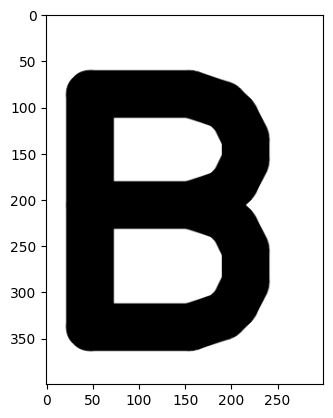

In [11]:
b_letter = np.ones((400,300,3),dtype=np.uint8)*255
height, width = b_letter.shape[:2]
#Đặt thông số cho ảnh
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 12
font_thickness = 50
color = (0,0,0)
text = 'B'

#Tính toán kích thước của chữ
(text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, font_thickness)
text_x = (width - text_width)//2
text_y = (height + text_height)//2

#Vẽ chữ B
cv2.putText(b_letter, text, (text_x, text_y),font, font_scale, color, font_thickness, cv2.LINE_AA)

#Hiển thị
plt.imshow(b_letter, cmap='gray')
plt.show()

Find secret by substract

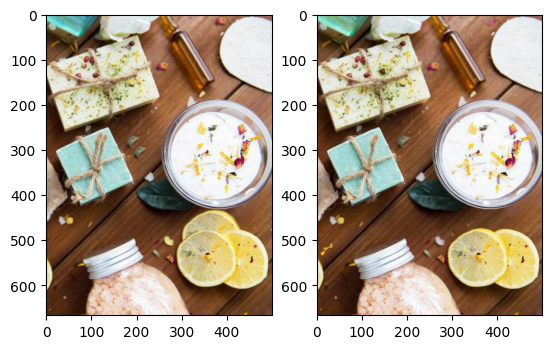

In [12]:
img1 = cv2.imread('img/pic1.jpg')
img2 = cv2.imread('img/pic2.jpg')
plt.figure()
plt.subplot(121); plt.imshow(img1[:,:,::-1])
plt.subplot(122); plt.imshow(img2[:,:,::-1])
plt.show()

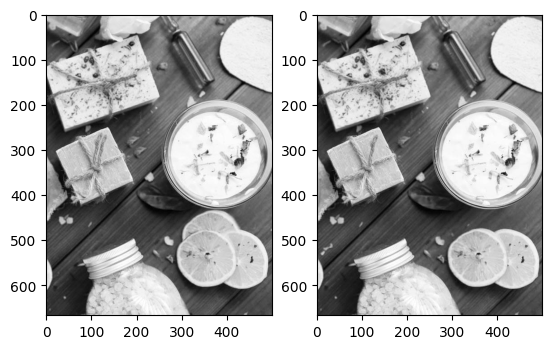

In [13]:
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.subplot(121); plt.imshow(gray_img1, cmap='gray')
plt.subplot(122); plt.imshow(gray_img2, cmap='gray')
plt.show()

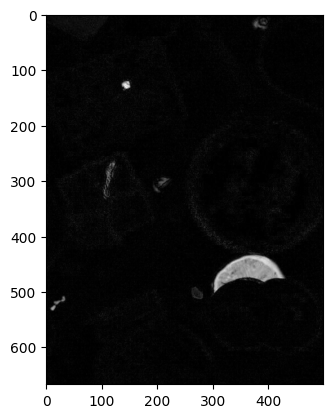

In [14]:
def findDifferent(img1, img2):
     # Đảm bảo rằng hai hình ảnh có cùng kích thước và kiểu dữ liệu
    if img1.shape != img2.shape:
        raise ValueError("Hai hình ảnh phải có cùng kích thước.")
    
    # Thực hiện phép trừ giữa hai hình ảnh
    different = cv2.absdiff(img1, img2)
    
    return different
different = findDifferent(gray_img1,gray_img2)
plt.imshow(different,cmap='gray')
plt.show()